In [1]:
import sys
from torchvision.datasets import MNIST, FashionMNIST
import matplotlib.pyplot as plt

sys.path.append('/content/drive/MyDrive/FF')
from trainer import Trainer

# MNIST

In [2]:
train_set = MNIST('./data/', train=True, download=True)
test_set = MNIST('./data/', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 131616604.92it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 24853445.59it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31866649.14it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 16979080.90it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
trainer = Trainer(train_set=train_set,
                  ff_dims=[784, 2000, 2000, 2000, 2000],
                  out_dim=10,
                  threshold=10,
                  lr=0.001,
                  batch_size=1000,
                  epochs=100,
                  dropout=0,
                  device='cuda:0')
trainer.train()

Create negative datas


100%|██████████| 60000/60000 [00:25<00:00, 2352.31it/s]



[Start training FF-Layers]
Training 0 ff-layer


100%|██████████| 100/100 [01:01<00:00,  1.63it/s, Loss=0.186]


Training 1 ff-layer


100%|██████████| 100/100 [01:09<00:00,  1.45it/s, Loss=0.116]


Training 2 ff-layer


100%|██████████| 100/100 [01:08<00:00,  1.46it/s, Loss=0.125]


Training 3 ff-layer


100%|██████████| 100/100 [01:08<00:00,  1.46it/s, Loss=0.118]



[Start training Softmax-Layer]


100%|██████████| 100/100 [00:55<00:00,  1.82it/s, Loss=0.017, Acc=0.999]


In [8]:
trainer.test(test_set)

[Test]
test error:  0.031500041484832764


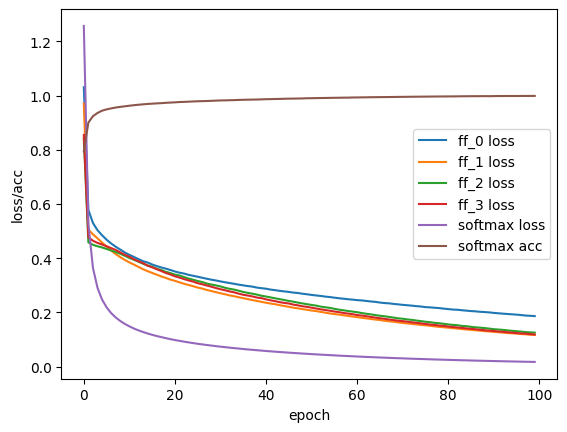

In [9]:
plt.xlabel('epoch')
plt.ylabel('loss/acc')
for i, row in enumerate(trainer.ffnn_his):
  plt.plot(row, label=f'ff_{i} loss')
plt.plot(trainer.softmax_his['loss'], label='softmax loss')
plt.plot(trainer.softmax_his['acc'], label='softmax acc')
plt.legend()

# FashionMNIST

In [10]:
train_set = FashionMNIST('./data/', train=True, download=True)
test_set = FashionMNIST('./data/', train=False, download=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 12374772.55it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 212419.47it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3887535.15it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7552387.90it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [11]:
trainer = Trainer(train_set=train_set,
                  ff_dims=[784, 2000, 2000, 2000, 2000],
                  out_dim=10,
                  threshold=10,
                  lr=0.001,
                  batch_size=1000,
                  epochs=100,
                  dropout=0,
                  device='cuda:0')
trainer.train()

Create negative datas


100%|██████████| 60000/60000 [00:23<00:00, 2513.30it/s]



[Start training FF-Layers]
Training 0 ff-layer


100%|██████████| 100/100 [00:59<00:00,  1.67it/s, Loss=0.141]


Training 1 ff-layer


100%|██████████| 100/100 [01:07<00:00,  1.47it/s, Loss=0.103]


Training 2 ff-layer


100%|██████████| 100/100 [01:07<00:00,  1.47it/s, Loss=0.0982]


Training 3 ff-layer


100%|██████████| 100/100 [01:08<00:00,  1.46it/s, Loss=0.091]



[Start training Softmax-Layer]


100%|██████████| 100/100 [00:55<00:00,  1.81it/s, Loss=0.194, Acc=0.931]


In [12]:
trainer.test(test_set)

[Test]
test error:  0.12620002031326294


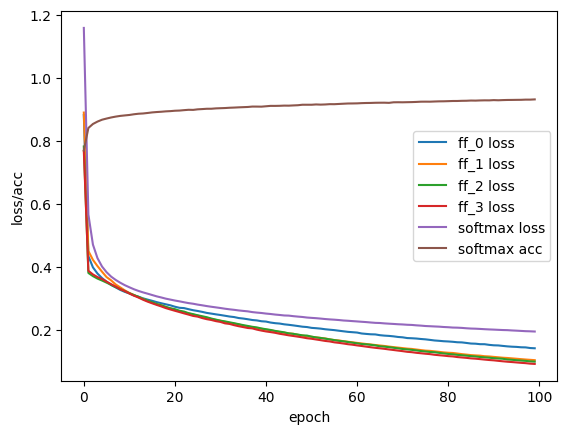

In [13]:
plt.xlabel('epoch')
plt.ylabel('loss/acc')
for i, row in enumerate(trainer.ffnn_his):
  plt.plot(row, label=f'ff_{i} loss')
plt.plot(trainer.softmax_his['loss'], label='softmax loss')
plt.plot(trainer.softmax_his['acc'], label='softmax acc')
plt.legend()